In [16]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import  matplotlib.pyplot as plt
from sklearn import datasets

In [17]:
x_data,y_data = datasets.make_gaussian_quantiles(n_samples=20,
                                                n_features=2,
                                                n_classes=2
                                                )

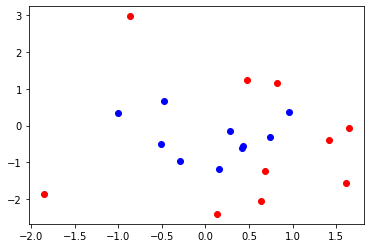

In [18]:
x_class0 = x_data[y_data==0]
x_class1 = x_data[y_data==1]

plt.scatter(x_class0[:,0],x_class0[:,1],marker='o',c='b')
plt.scatter(x_class1[:,0],x_class1[:,1],marker='o',c='r')
plt.show()

In [19]:
y_data = y_data.reshape(-1,1)

In [20]:
X_train,X_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.3)

In [21]:
n_input = X_train.shape[1]
n_output = y_train.shape[1]
n_clu1 = 700

In [22]:
x = tf.placeholder(tf.float32,shape=(None,n_input),name="x")
y = tf.placeholder(tf.float32,shape=(None,n_output),name="y")
keep_prob = tf.placeholder(tf.float32,name="keep_prob")

In [23]:
w_1 = tf.Variable(tf.random.normal([n_input,n_clu1]),dtype = tf.float32,name="w_1")
b_1 = tf.Variable(tf.random.normal([n_clu1]),dtype = tf.float32,name="b_1")


In [24]:
z_1 = tf.matmul(x,w_1)+b_1
a_1 = tf.nn.relu(z_1)
drop_1 = tf.nn.dropout(a_1,keep_prob=keep_prob)

In [25]:
w_2 = tf.Variable(tf.random.normal([n_clu1,n_output]),dtype = tf.float32,name="w_2")
b_2 = tf.Variable(tf.random.normal([n_output]),dtype = tf.float32,name="b_2")
z_2 = tf.matmul(drop_1,w_2)+b_2
y_hat = tf.sigmoid(z_2)

In [26]:
cost = -tf.reduce_mean(y*tf.log(y_hat+tf.pow(10.0,-9))+(1-y)*tf.log(1-y_hat+tf.pow(10.0,-9)))

In [27]:
gradience = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [28]:
num_epochs = 500
cost_epochs = []
val_epochs = []
prediction = []

In [29]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        tfs.run(gradience,feed_dict={x:X_train,y:y_train,keep_prob:0.5})
        cost_val = tfs.run(cost,feed_dict={x:X_train,y:y_train,keep_prob:1})
        cost_epochs.append(cost_val)
        test_val = tfs.run(cost,feed_dict={x:X_test,y:y_test,keep_prob:1})
        val_epochs.append(test_val)
    prediction = tfs.run(y_hat,feed_dict={x:X_test,keep_prob:1})

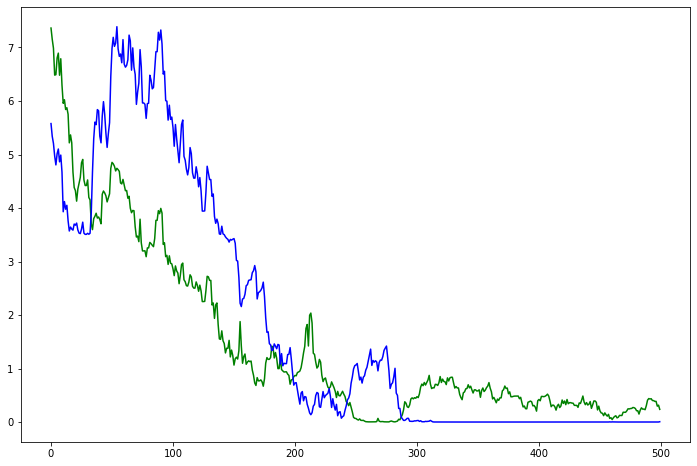

In [30]:
plt.figure(figsize=(12,8))
plt.plot(cost_epochs,"g")
plt.plot(val_epochs,"b")
plt.show()